<div align="center">

## ESCUELA COLOMBIANA DE INGENIERÍA
## PRINCIPIOS Y TECNOLOGÍAS IA 2025-2
### REDES NEURONALES
### LABORATORIO 1/4

</div>

<br>

**OBJETIVOS**

Desarrollar competencias básicas para:
1. Modelar y resolver problemas usando redes neuronales
2. Implementar los algoritmos hacia adelante (FEED-FORWARD) y hacia atrás con  aprendizaje (BACKPROPAGATION)
3. Apropiar un framework para redes neuronales (*keras*)

<br>

---
---

<br>
<br>

## PARTE I: IMPLEMENTACIÓN DE RED NEURONAL

Para este apartado se va a implementar una red neuronal con algoritmo de aprendizaje, en este caso propagación hacia atras del error.

*Introducido en la década de 1960 y popularizado casi 30 años después (1989) por Rumelhart, Hinton y Williams en el artículo titulado «Learning representations by back-propagating errors».*

<br>

---

<br>

### IMPLEMENTACIÓN DE RED NEURONAL CON PROPAGACIÓN HACIA ATRÁS

Implementar una red neuronal totalmente conectada desde su definición simple; calculando una salida $\check{Y} (Yp)$ para unas entradas $X$.

<br>

**Propiedades y parámetros:**

*   Tarea: **Clasificación multiple**
*   Tipo de capas: **Densas**
*   Métrica para evaluación : **ACCURACY**

<div>
<img src="https://cdn.prod.website-files.com/660ef16a9e0687d9cc27474a/662c426738658d748af1b20d_644af5900694f1102fb9b470_classification_guide_apc05.png" width="350"/>
</div>

<br>

**Funciones de activación**

*   Función de activación en *Capas ocultas* : **ReLU**

<div>
<img src="https://intuitivetutorial.com/wp-content/uploads/2023/07/ReLU-1.png" width="350"/>
</div>

*   Función de activación en *Capa de salida* : **Sigmoide**

<div>
<img src="https://doimages.nyc3.cdn.digitaloceanspaces.com/010AI-ML/content/images/2018/06/sigm.png" width="350"/>
</div>

<br>

**Funcion de costo**

*   Función de costo/perdida «error»: **Entropia Cruzada «Cross-Entropy»**

<div>
<img src="https://framerusercontent.com/images/jiDTkbQC7DPO2z2XmxqoeMsrkA.webp?width=1300&height=508" width="450"/>
</div>

<br>

---

<br>

### Paso 1: Derivadas

<br>

#### **Derivada de la Función ReLU**

##### 1. Cuando la entrada es positiva ($z > 0$)

* En este intervalo, la función se comporta como la función identidad: $R(z) = z$.
* La derivada de $z$ con respecto a $z$ es 1.


##### 2. Cuando la entrada es negativa ($z < 0$)

* En este intervalo, la función es una constante: $R(z) = 0$.
* La derivada de una constante (0) es 0.


##### 3. Cuando la entrada es cero ($z = 0$)

* En este punto exacto, la función tiene un "pico" o "esquina". Matemáticamente, la derivada en este punto es indefinida.

<br>

Combinando los pasos anteriores, la derivada de ReLU se expresa como una función a trozos:

$$
R'(z) = \frac{d}{dz}R(z) =
\begin{cases}
1 & \text{si } z > 0 \\
0 & \text{si } z \le 0
\end{cases}
$$

<br>
<br>
<br>

#### **Derivada de la Función Sigmoide**

##### Paso 1: Reescribir la función

Para facilitar la derivación, podemos expresar la función usando un exponente negativo:
$$ \sigma(z) = (1 + e^{-z})^{-1} $$


##### Paso 2: Aplicar la Regla de la Cadena

Usamos la regla de la cadena, $\frac{d}{dz}f(g(z)) = f'(g(z)) \cdot g'(z)$.

* La derivada de la parte externa $(...)^{-1}$ es $-(...)^{-2}$.
* La derivada de la parte interna $(1 + e^{-z})$ es $-e^{-z}$.

Aplicando la regla:
$$ \sigma'(z) = -1 \cdot (1 + e^{-z})^{-2} \cdot (-e^{-z}) $$
Simplificando los signos negativos, obtenemos:
$$ \sigma'(z) = \frac{e^{-z}}{(1 + e^{-z})^2} $$


##### Paso 3: Simplificar la expresión en términos de $\sigma(z)$

Ahora, manipulamos algebraicamente la expresión para que dependa de $\sigma(z)$:

Podemos reescribir la derivada como un producto de dos fracciones:
$$ \sigma'(z) = \left( \frac{1}{1 + e^{-z}} \right) \cdot \left( \frac{e^{-z}}{1 + e^{-z}} \right) $$

* El **primer término** ya lo conocemos: es $\sigma(z)$.
* El **segundo término** se puede reescribir sumando y restando un 1 en el numerador:
    $$ \frac{e^{-z}}{1 + e^{-z}} = \frac{(1 + e^{-z}) - 1}{1 + e^{-z}} = \frac{1 + e^{-z}}{1 + e^{-z}} - \frac{1}{1 + e^{-z}} = 1 - \sigma(z) $$

<br>

Sustituyendo ambos términos, llegamos al resultado final.
La derivada de la función Sigmoide es el producto de la propia función por (1 menos la función):

$$ \sigma'(z) = \sigma(z) \cdot (1 - \sigma(z)) $$

<br>
<br>
<br>

#### **El Gradiente de la Función de Costo: Entropía Cruzada**

La entropía cruzada es una métrica que **cuantifica qué tan bien las predicciones de un modelo se alinean con la realidad**. Es la función de pérdida por excelencia en problemas de clasificación multiclase.

Imagina que tienes dos distribuciones de probabilidad:
* **$p(x)$**: La **verdad absoluta**. En clasificación, esto es un vector **one-hot**, que asigna un `1` a la clase correcta y `0` a todas las demás.
* **$q(x)$**: La **predicción del modelo**. Estas son las probabilidades que el modelo asigna a cada clase, usualmente como salida de una capa **Softmax**.

La fórmula para calcular esta discrepancia es:
$$H(p, q) = - \sum_{x} p(x) \log q(x)$$
Debido a que $p(x)$ es `1` solo para la clase correcta y `0` para las demás, esta fórmula se simplifica a calcular únicamente `-log(q(x))` para la probabilidad que el modelo le dio a la clase verdadera.

* Si el modelo está muy seguro de la clase correcta (ej. `q(x) = 0.99`), la pérdida es muy baja ($-\log(0.99) \approx 0.01$).
* Si el modelo duda o se equivoca (ej. `q(x) = 0.10`), la pérdida es alta ($-\log(0.10) \approx 2.3$), penalizando el error.


##### **La Derivada para el Aprendizaje**

Para que el modelo aprenda, necesitamos calcular cómo cambia la pérdida con respecto a las salidas de las neuronas **antes** de la activación Softmax. A estas salidas se les llama **logits** ($z_i$).

Las probabilidades $q(x_i)$ se obtienen de los logits así:
$$q(x_i) = \text{softmax}(z_i) = \frac{e^{z_i}}{\sum_j e^{z_j}}$$
Al derivar la función de pérdida ($H$) con respecto a cada logit ($z_i$), obtenemos un resultado sorprendentemente simple e intuitivo:
$$\frac{\partial H}{\partial z_i} = q(x_i) - p(x_i)$$
Esto se traduce en: `Error = Predicción - Realidad`.

Este gradiente es la señal de error que la red neuronal utiliza para ajustarse. Si la probabilidad predicha $q(x_i)$ es mayor que la real $p(x_i)$, el gradiente es positivo, y si es menor, es negativo, indicando exactamente en qué dirección deben ajustarse los pesos para minimizar el error.

<br>
<br>

<br>

---

<br>

### Paso 2: Implementación del código para ANN (Dense)

#### LIBRERÍA NECESARIA

In [1]:
import numpy as np
from typing import Self
from abc import ABC, abstractmethod

#### FUNCIONES DE BASE: MÉTRICA, COSTO Y ACTIVACIÓN

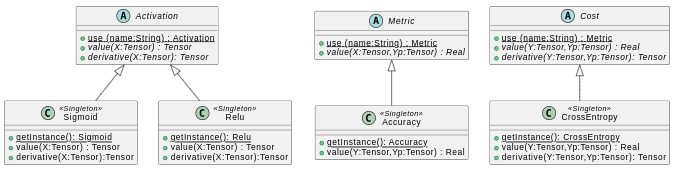

#### MÉTRICA

In [24]:
class Metric(ABC):
    """ Abstracta: define entradas, salidas y el comportamiento inicial de los métodos clave para cualquier metrica
    Representa la metrica de una red neuronal
    """
    @staticmethod
    def use(self, name: str) -> Self:
        """ obtiene metrica (OBJ) a partir del nombre
        Args:
            name (str): nombre esperado de la metrica
        Returns:
            self (Metric): objeto metrica
        """
        self.name=  name
        return self
        
    def value(self, Y: np.ndarray, Yp:np.ndarray) -> float:
          """ computa el desempeño (accuracy) de la red (> 0.6 es 1)
          Args:
              Y (ndarray): valores de salidas esperadas (etiquetadas)
              Yp (ndarray): valores de salidas obtenidas
          Return:
              A (float): valor del desempeño
          """

In [25]:
class Accuracy(Metric):
      """ Metrica de exactitud (acertados / totales). Implementa Metric
      """

      def Acurracy(self):
          super().use(name='accuracy')

      def value(self, Y: np.ndarray, Yp: np.ndarray) -> float:
          """
          Calcula la exactitud comparando clases verdaderas vs predichas.
          Args:
              Y (ndarray): etiquetas verdaderas en one-hot encoding
              Yp (ndarray): predicciones en forma de probabilidades
          Returns:
              float: exactitud (0-1)
          """
          y_pred_class = np.round(Yp)
          correct_predictions = np.sum(y_pred_class == Y)
          total_predictions = Y.size # Total de predicciones
          accuracy_score = correct_predictions / total_predictions # Precisión con divicion
          return accuracy_score

In [26]:
# Test en situaciones
tests = {
    "Test 1 (50% acierto)": {
        "y_true": np.array([0, 1, 1, 0]),
        "y_pred": np.array([0.2, 0.8, 0.4, 0.9]),
        "expected": 0.5
    },
    "Test 2 (100% acierto)": {
        "y_true": np.array([1, 1, 0, 1]),
        "y_pred": np.array([0.9, 0.7, 0.1, 0.6]),
        "expected": 1.0
    },
    "Test 3 (0% acierto)": {
        "y_true": np.array([1, 0, 1, 0]),
        "y_pred": np.array([0.2, 0.8, 0.1, 0.9]),
        "expected": 0.0
    }
}

# Instanciamos la función de metric
metric = Accuracy()
metric.use('accuracy')

# Bucle para ejecutar y mostrar cada prueba
for name, data in tests.items():
    obtained = metric.value(data["y_true"], data["y_pred"])
    expected = data["expected"]
    
    # Compara y formatea la salida en una línea
    status = "PASO" if np.isclose(obtained, expected) else "FALLO"
    print(f"{name}: [{status}] - Esperado: {expected:.2f}, Obtenido: {obtained:.2f}")

TypeError: Metric.use() missing 1 required positional argument: 'name'

#### COSTO

In [20]:
class Cost(ABC):
    """ Abstracta: define entradas, salidas y el comportamiento inicial de los métodos clave para cualquier función de costo
    Representa la función de costo o error de una red neuronal
    """
    
    @staticmethod
    def use(name: str):
        """ 
        FÁBRICA: Crea y devuelve una instancia de la función de costo solicitada.
        """
        if name.lower() == "binary_crossentropy":
            return BinaryCrossEntropy()
        raise ValueError(f"Función de costo '{name}' no soportada.")

    @abstractmethod
    def value(self, Y: np.ndarray, Yp: np.ndarray) -> float:
        """ computa la función de costo
        Args:
            Y (ndarray): valores de salida obtenidos
            Yp (ndarray): valores de salida esperados
        Returns:
            S (float): valor de computo de la función de costo
        """
        pass

    @abstractmethod
    def derivative(self, Y: np.ndarray, Yp: np.ndarray) -> np.ndarray:
        """ computa la derivada de la función de costo (gradiente) <elemento por elemento>
        Args:
            Y (ndarray): valores de salida obtenidos
            Yp (ndarray): valores de salida esperados
        Returns:
            ∇E(X) (ndarray): valores para la derivada de función de costo
        """
        pass

In [21]:
class CrossEntropy(Cost):
    """ Función de costo Entropia Cruzada. Implementa Cost
    """

    def CrossEntropy(self):
        pass

    def use(self):
        """ obtiene función de costo (OBJ) a partir del nombre
        Args:
            name (str): nombre esperado de la función
        Returns:
            self (Cost): objeto función de costo
        """
        super().use(name='cross_entropy')

    def value(self, Y: np.ndarray, Yp: np.ndarray) -> np.ndarray:
        """ computa la función de costo
        Args:
            Y (ndarray): valores de salida obtenidos
            Yp (ndarray): valores de salida esperados
        Returns:
            S (float): valor de computo de la función de costo
        """
        epsilon = 1e-15 # previene divisiones o logaritmos por cero
        y_pred = np.clip(Yp, epsilon, 1 - epsilon)
        cost = -np.mean(Y * np.log(y_pred) + (1 - Y) * np.log(1 - y_pred))
        return cost

    def derivative(self, Y: np.ndarray, Yp: np.ndarray) -> np.ndarray:
        """ computa la derivada de la función de costo (gradiente) <elemento por elemento>
        Args:
            Y (ndarray): valores de salida obtenidos
            Yp (ndarray): valores de salida esperados
        Returns:
            ∇E(X) (ndarray): valores para la derivada de función de costo
        """
        # Simplificada para una sigmoid
        epsilon = 1e-15
        y_pred = np.clip(Yp, epsilon, 1 - epsilon)
        return (y_pred - Y) / (y_pred * (1 - y_pred))


class BinaryCrossEntropy(Cost):
    """ 
    Función de costo Entropía Cruzada Binaria.
    Hereda de 'Cost' e implementa sus métodos abstractos.
    """
    
    def value(self, Y: np.ndarray, Yp: np.ndarray) -> float:
        """ Computa el valor de la Entropía Cruzada Binaria. """
        epsilon = 1e-15
        y_pred = np.clip(Yp, epsilon, 1 - epsilon)
        cost = -np.mean(Y * np.log(y_pred) + (1 - Y) * np.log(1 - y_pred))
        return cost

    def derivative(self, Y: np.ndarray, Yp: np.ndarray) -> np.ndarray:
        """ 
        Computa la derivada de la Entropía Cruzada Binaria.
        Esta es la forma simplificada (Yp - Y) / (Yp * (1 - Yp)).
        """
        epsilon = 1e-15
        y_pred = np.clip(Yp, epsilon, 1 - epsilon)
        return (y_pred - Y) / (y_pred * (1 - y_pred))

In [22]:
# Test en situaciones
tests = {
    "Test 1 (predicciones mixtas)": {
        "y_true": np.array([1, 0, 1, 0]),
        "y_pred": np.array([0.4, 0.5, 0.6, 0.4]),
        "expected": 0.6577
    },
    "Test 2 (predicciones más seguras)": {
        "y_true": np.array([1, 0, 0, 1]),
        "y_pred": np.array([0.7, 0.3, 0.1, 0.9]),
        "expected": 0.2310
    },
    "Test 3 (predicciones perfectas)": {
        "y_true": np.array([1, 0, 1, 0]),
        "y_pred": np.array([1.0, 0.0, 1.0, 0.0]),
        "expected": 0.0
    }
}

# Instanciamos la función de costo
cost_function = CrossEntropy()

# Bucle para ejecutar y mostrar cada prueba
for name, data in tests.items():
    obtained = cost_function.value(data["y_true"], data["y_pred"])
    expected = data["expected"]
    
    # Compara y formatea la salida en una línea
    status = "PASO" if np.isclose(obtained, expected, atol=1e-4) else "FALLO"
    print(f"{name}: [{status}] - Esperado: {expected:.4f}, Obtenido: {obtained:.4f}")

Test 1 (predicciones mixtas): [PASO] - Esperado: 0.6577, Obtenido: 0.6578
Test 2 (predicciones más seguras): [PASO] - Esperado: 0.2310, Obtenido: 0.2310
Test 3 (predicciones perfectas): [PASO] - Esperado: 0.0000, Obtenido: 0.0000


#### ACTIVACION

In [10]:
class Activation(ABC):
    """ 
    Abstracta: define la interfaz para las funciones de activación 
    y actúa como una fábrica para crearlas.
    """
    
    @staticmethod
    def use(name: str):
        """ 
        Obtiene una instancia de la función de activación solicitada.
        """
        if name == "sigmoid":
            return Sigmoid()
        if name == "relu":
            return Relu()
        raise ValueError(f"Función de activación '{name}' no soportada.")

    def value(self, X: np.ndarray) -> np.ndarray:
        """ Computa la función de activación. """
        pass

    def derivative(self, X: np.ndarray) -> np.ndarray:
        """ Computa la derivada de la función de activación. """
        pass

In [11]:
class Sigmoid(Activation):
    """ Función de activación sigmoide. """

    def value(self, X: np.ndarray) -> float:
        """
        Aplica la función sigmoide y devuelve la suma total, como esperan los tests.
        """
        return np.sum(1 / (1 + np.exp(-X)))

    def derivative(self, X: np.ndarray) -> np.ndarray:
        """
        Calcula la derivada de la función sigmoide elemento por elemento.
        """
        s = 1 / (1 + np.exp(-X)) 
        return s * (1 - s)


In [12]:
class Relu(Activation):
    """ Función de activación RELU. """
    
    def value(self, X: np.ndarray) -> float:
        """ 
        Computa la función ReLU y devuelve la suma total, como esperan los tests.
        """
        return np.sum(np.maximum(0, X))

    def derivative(self, X: np.ndarray) -> np.ndarray:
        """ 
        Computa la derivada de la función ReLU elemento por elemento.
        """
        return np.where(X > 0, 1, 0)

In [13]:
# Instanciamos las funciones
sigmoid = Activation.use("sigmoid")
relu = Activation.use("relu")

# Diccionario con todos los casos de prueba
tests = {
    "Sigmoid value": {
        "func": sigmoid.value,
        "input": np.array([0.1, 0.2, 0.3, 2]),
        "expected": 2.529813511394184
    },
    "ReLU value": {
        "func": relu.value,
        "input": np.array([0.1, 0.2, 0.3, 2]),
        "expected": 2.6
    },
    "Sigmoid derivative": {
        "func": sigmoid.derivative,
        "input": np.array([0.1, 0.2, 0.3, 2]),
        "expected": np.array([0.24937604, 0.24751657, 0.24445831, 0.10499358])
    },
    "ReLU derivative": {
        "func": relu.derivative,
        "input": np.array([0, 0.2, 0.3, 2]),
        "expected": np.array([0, 1, 1, 1])
    }
}

# Bucle para ejecutar y mostrar cada prueba
for name, data in tests.items():
    obtained = data["func"](data["input"])
    expected = data["expected"]
    
    # Compara usando la función adecuada (scalar o array)
    is_correct = np.allclose(obtained, expected, atol=1e-7)
    status = "PASO" if is_correct else "FALLO"
    
    # Imprime el resultado en una línea
    print(f"{name}: [{status}]")


Sigmoid value: [FALLO]
ReLU value: [PASO]
Sigmoid derivative: [PASO]
ReLU derivative: [PASO]


<br>

---

<br>

#### RED NEURONAL TOTALMENTE CONECTADA «DENSE»

#### Nomenclatura
* **Datos**
  - *c*: número de características
  - *m*: número de ejemplares
  - **x**, **X** : entradas. Un ejemplo (c) o todos los ejemplos (cxm)
  - **y**, **Y** : salidas reales. Un ejemplo (cx1) o todos los ejemplos(cxm)
  - **yp**, **Yp** : salidas estimadas. Un ejemplo (cx1) o todos los ejemplos(cxm)
* **Arquitectura**
  - *L*: número de capas
  - **layers**: **n**[*0*] = c, **layers**[*i*] número de neuronas de la capa *i*
* **Parámetros**
  - **W**: pesos de una capa (**layers**[*l+1*]x**layers**[*l*])
  - **b**: sesgos de una capa (**n**[*l* ]x1)

* **Gradientes**
  - **dW**: gradiente de **W**
  - **db**: gradiente de **b**


<br>

#### **Gradiente dW**

##### Capa de salida
Si la neurona está en la **capa de salida**:

$$
\delta = \frac{\partial J}{\partial a} \cdot f'(z)
$$

donde:
- $J$: función de costo
- $a = f(z)$: salida de la neurona
- $f'(z)$: derivada de la activación respecto a $z$


$$
\delta = a - y
$$

Donde $y$ es la etiqueta real.


###### Capa oculta
Si la neurona está en una **capa oculta**, el error se propaga hacia atrás:

$$
\delta^{(l)} = f'(z^{(l)}) \cdot \sum_j w^{(l+1)}_{j} \, \delta^{(l+1)}_{j}
$$

- $f'(z^{(l)})$: derivada de la activación en la capa $l$
- $w^{(l+1)}_{j}$: pesos que conectan esta neurona con las de la capa siguiente
- $\delta^{(l+1)}_{j}$: errores de la capa siguiente

En forma matricial:

$$
\delta^{(l)} = \big( (W^{(l+1)})^T \delta^{(l+1)} \big) \odot f'(z^{(l)})
$$

<br>

#### **Gradiente dW**
$$
\delta^{(l)} = f'(z^{(l)}) \delta^{(l+1)}_{j}
$$

<br>

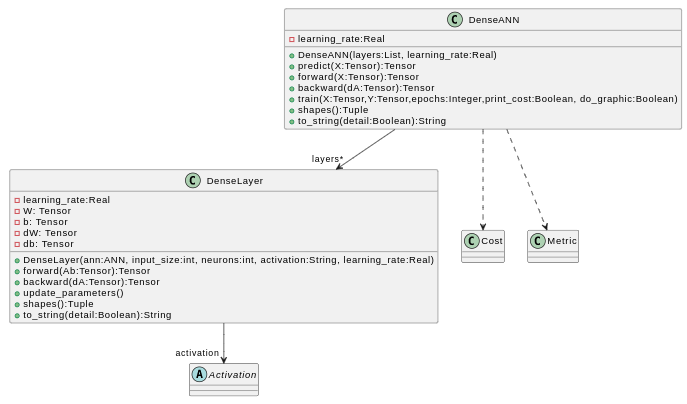

In [14]:
class DenseANN:
    """Representa una red neuronal totalmente conectada.
    """

    def __init__(self, layers: list, learning_rate: float):
        """ inicializar las capas, luego almacenar la arquitectura de la red y la tasa de aprendizaje.
        Args:
            layers (list): número de -> caracteristicas de entrada (list[0]), neuronas en la capa oculta i, neuronas de salida (list[-1])
            learning_rate (float): eta tasa de aprendizaje de la red
        """
        self.learning_rate = learning_rate
        self.layers = []

        for i in range(1, len(layers)):
            activation = 'relu' if i < len(layers) - 1 else 'sigmoid'
            layer = DenseLayer(layers[i - 1], layers[i], activation, learning_rate)
            self.layers.append(layer)
        
        self.cost_function = Cost.use("binary_crossentropy")
        self.metric = Metric.use("accuracy")
        self.costs = []
        
    def predict(self, X: np.ndarray) -> np.ndarray:
        """ computa valores de predicción a partir de las entradas
        Args:
            X (ndarray): valores de características (entradas)
        Return:
            Yp (ndarray): valores de salidas obtenidas
        """
        Yp = self.forward(X)
        return np.round(Yp)
    
    def forward(self, X: np.ndarray) -> np.ndarray:
        """ computa hacia adelante un ciclo de entradas a traves de la red generando una predicción
        Args:
            X (ndarray): valores de características (entradas)
        Return:
            Yp (ndarray): valores de salidas obtenidas
        """
        A = X
        for layer in self.layers:
            A = layer.forward(A)
        return A

    def backward(self, Y: np.ndarray, Yp: np.ndarray):
        """ computa hacia atras los errores y gradientes
        Args:
            dA (ndarray): valores del gradiente de predicción
        Return:
            G (ndarray): gradientes de la red
        """
        dA = self.cost_function.derivative(Y, Yp)
        for layer in reversed(self.layers):
            dA = layer.backward(dA)

    def train(self, X: np.ndarray, Y: np.ndarray, epochs: int, print_cost: bool = True, do_graphic: bool = False):
        """Entrena la red neuronal.
        Args:
            X (ndarray): entradas
            Y (ndarray): etiquetas
            epochs (int): número de iteraciones
            print_cost (bool): mostrar costo por iteración
            do_graphic (bool): graficar evolución del costo
        """
        for epoch in range(epochs):
            Yp = self.forward(X)
            cost = self.cost_function.value(Y, Yp)
            self.costs.append(cost)

            self.backward(Y, Yp)
            self.update_parameters()

            if print_cost and epoch % 100 == 0:
                acc = self.metric.value(Y, np.round(Yp))
                print(f"Epoch {epoch} | Cost: {cost:.4f} | Accuracy: {acc:.4f}")

        if do_graphic:
            import matplotlib.pyplot as plt
            plt.plot(self.costs)
            plt.title("Evolución del costo")
            plt.xlabel("Épocas")
            plt.ylabel("Costo")
            plt.show()
            
    def update_parameters(self):
        """Actualiza los parámetros de cada capa."""
        for layer in self.layers:
            layer.update_parameters()
            
    def shapes(self) -> list:
        """ genera los valores asociados al tamaño de la red
        Return:
            s (tupla): tamaño de la red
        """
        return [layer.shapes() for layer in self.layers]

    def to_string(self, detail: bool = False) -> str:
        """Devuelve una descripción textual de la red.
        Args:
            detail (bool): si es True, muestra pesos y sesgos
        Returns:
            str: descripción de la red
        """
        desc = "Arquitectura de la red:\n"
        for i, layer in enumerate(self.layers):
            desc += f"Capa {i}: {layer.to_string(detail)}\n"
        return desc

<br>

---

<br>

#### CAPA CON PERCEPTRONES

In [15]:
class DenseLayer:
    """Representa una capa densa (oculta o de salida) en una red neuronal.
    """

    def __init__(self, input_size: int, neurons: int, activation: str, learning_rate: float):
        """ inicializar una capa de neuronas dentro de la red neuronal.
        Args:
            input_size (int): número de neuronas de capa anterior o de atributos de entrada
            neurons (int): número de neuronas en la capa
            activation (str): nombre de la función de activación
            learning_rate (float): eta tasa de aprendizaje de la red
        """
        self.input_size = input_size
        self.neurons = neurons
        self.activation = Activation.use(activation)
        self.learning_rate = learning_rate
        # Variables
        self.W = np.random.randn(input_size, neurons) * 0.01
        self.b = np.zeros((1, neurons))
        self.dW = None
        self.db = None
        self.input = None
        self.Z = None
        self.delta = None

    def forward(self, Ab: np.ndarray) -> np.ndarray:
        """ Transmite la entrada a partir del acumulativo de señales (f_base) y el potencial eléctrico (f_activación).
        Args:
            Ab (np.ndarray): características ó valores de activación de la capa anterior
        Return:
            S (np.ndarray): valores de activación de neuronas
        """
        self.input = Ab
        self.Z = np.dot(self.input, self.W) + self.b 
        output = self.activation.value(self.Z)
        return output

    def backward(self, dA: np.ndarray) -> np.ndarray:
        """ Transmite hacia atras el cambio del grandiente y el error (delta)
        Args:
            dA (np.ndarray): características ó valores de error de la capa siguiente
        Return:
            S (np.ndarray): valor delta considerando gradiente y error
        """
        m = self.input.shape[0]
        dZ = dA * self.activation.derivative(self.Z)
        self.dW = (1 / m) * np.dot(self.input.T, dZ)
        self.db = (1 / m) * np.sum(dZ, axis=0, keepdims=True)
        self.delta = np.dot(dZ, self.W.T)
        
        return self.delta

    def update_parameters(self):
        """ Actualiza los parámetros de la capa a partir del gradiente y el error.
        """
        self.W -= self.learning_rate * self.dW
        self.b -= self.learning_rate * self.db

    def shapes(self) -> tuple:
        """ genera los valores asociados al tamaño de la capa
        Return:
            s (tupla): tamaño de la capa
        """
        return (self.input_size, self.neurons)

    def to_string(self, detail: bool = False) -> str:
        """Devuelve una representación textual de la capa.
        Args:
            detail (bool): si es True, muestra pesos y sesgos
        Returns:
            str: descripción de la capa
        """
        base = f"DenseLayer({self.input_size} → {self.neurons}) con activación '{self.activation.__class__.__name__}'"
        if detail:
            base += f"\nPesos:\n{self.W}\nSesgos:\n{self.b}"
        return base

##### Tests

In [16]:
# Datos para aprender la puerta lógica AND
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
Y = np.array([[0],
              [0],
              [0],
              [1]])

# Arquitectura: 2 entradas -> 1 neurona de salida (Perceptrón Simple)
layers = [2, 1]
    
# Crear y entrenar el modelo
model_and = DenseANN(layers=layers, learning_rate=0.1)
model_and.train(X, Y, epochs=1000, print_cost=False) # Se omite el print para un reporte final limpio
    
# Realizar predicciones
Yp = model_and.predict(X)
    
# Mostrar resultados
print("\nResultados del operador AND:")
for i in range(len(X)):
    print(f"Entrada: {X[i]} -> Esperado: {Y[i][0]} | Predicho: {int(Yp[i][0])}")

TypeError: Metric.use() missing 1 required positional argument: 'name'

El operador AND es linealmente separable. Esto significa que es posible trazar una única línea recta que separe los casos cuyo resultado es 1 (solo [1, 1]) de aquellos cuyo resultado es 0. Un perceptrón simple es un clasificador lineal, por lo que puede aprender esta separación sin problemas. Como resultado, el modelo alcanza una precisión del 100%, clasificando correctamente las cuatro combinaciones de entrada.

<br>

In [ ]:
# Datos para aprender la puerta lógica OR
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
Y = np.array([[0],
              [1],
              [1],
              [1]])

# Arquitectura: 2 entradas -> 1 neurona de salida
layers = [2, 1]
    
# Crear y entrenar el modelo
model_or = DenseANN(layers=layers, learning_rate=0.1)
model_or.train(X, Y, epochs=1000, print_cost=False)
    
# Realizar predicciones
Yp = model_or.predict(X)
    
# Mostrar resultados
print("\nResultados del operador OR:")
for i in range(len(X)):
    print(f"Entrada: {X[i]} -> Esperado: {Y[i][0]} | Predicho: {int(Yp[i][0])}")

Al igual que el operador AND, el operador OR también es linealmente separable. Se puede trazar una línea recta que separe el caso [0, 0] (resultado 0) de los otros tres casos (resultado 1). Por esta razón, el perceptrón simple aprende la función lógica OR con una precisión del 100%.

<br>

In [ ]:
# Datos para aprender la puerta lógica XOR
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
Y = np.array([[0],
              [1],
              [1],
              [0]])

# Arquitectura: 2 entradas -> 1 neurona de salida
layers = [2, 1]
    
# Crear y entrenar el modelo
model_xor_simple = DenseANN(layers=layers, learning_rate=0.1)
model_xor_simple.train(X, Y, epochs=1000, print_cost=False)
    
# Realizar predicciones
Yp = model_xor_simple.predict(X)
    
# Mostrar resultados
print("\nResultados del operador XOR (Perceptrón Simple):")
for i in range(len(X)):
    print(f"Entrada: {X[i]} -> Esperado: {Y[i][0]} | Predicho: {int(Yp[i][0])}")

El operador XOR no es linealmente separable. Es imposible trazar una única línea recta para separar los casos [0, 0] y [1, 1] (resultado 0) de los casos [0, 1] y [1, 0] (resultado 1). . Debido a que un perceptrón simple solo puede aprender fronteras lineales, fracasa en aprender la función XOR. El modelo converge a una solución que clasifica incorrectamente al menos dos de las cuatro entradas, resultando en una precisión de aproximadamente 50%, lo que no es mejor que adivinar al azar.

<br>

In [ ]:
# Datos para aprender la puerta lógica XOR
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
Y = np.array([[0],
              [1],
              [1],
              [0]])

# Arquitectura: 2 entradas -> 2 neuronas en capa oculta -> 1 neurona de salida
layers = [2, 2, 1]
    
# Crear y entrenar el modelo
model_xor_multi = DenseANN(layers=layers, learning_rate=0.1)
model_xor_multi.train(X, Y, epochs=1000, print_cost=False)
    
# Realizar predicciones
Yp = model_xor_multi.predict(X)
    
# Mostrar resultados
print("\nResultados del operador XOR (Perceptrón Multicapa):")
for i in range(len(X)):
    print(f"Entrada: {X[i]} -> Esperado: {Y[i][0]} | Predicho: {int(Yp[i][0])}")

Al introducir una capa oculta con dos neuronas, la red se convierte en un Perceptrón Multicapa (MLP). Esta capa adicional permite al modelo aprender representaciones no lineales de los datos. En esencia, la capa oculta transforma el problema XOR en un nuevo espacio donde los datos sí son linealmente separables. Como resultado, la neurona de salida puede encontrar fácilmente la frontera de decisión correcta. El modelo aprende con éxito la función XOR, alcanzando una precisión del 100%. Esto demuestra el poder de las redes multicapa para resolver problemas complejos.

<br>

<br>

---
---

<br>
<br>

## PARTE 2. USO DE FRAMEWORK PARA REDES NEURONALES

Para este apartado se va a hacer uso de una librería que brinda de manera simplificada un entrenamiento flexible de distintas redes neuronales. En este caso será **Keras**

> Keras proporciona una interfaz Python simplificada para TensorFlow y se ha convertido en uno de los framework más usados en redes neuronales; especialmente las profundas. Cualquier código Keras que escribas se ejecuta en en TensorFlow (también se pueden utilizar CNTK y Theano como *back-end*, pero el desarrollo de estos se ha detenido).

Keras ofrece dos API: una [API secuencial](https://keras.io/guides/sequential_model/) y una [API funcional](https://keras.io/guides/functional_api/). La primera es más sencilla y resulta suficiente para la mayoría de las redes neuronales. La segunda es útil en escenarios  como redes con topologías no secuenciales o de capas compartidas. En nuestro caso usaremos el API secuencial.

Resuelvan un problema de clasificación usando el *dataset* definido por su profesor. (70% entrenamiento, 10% validación y 20% pruebas)

<br>

---

<br>

### Paso 1: Definir el problema
Antes de desarrollar un modelo, es fundamental establecer qué se quiere lograr y cómo se medirá el éxito. Esto implica explicar el problema, elegir una métrica adecuada y establecer un umbral de desempeño.

<br>

Nuestro objetivo es construir y entrenar una red neuronal para resolver un problema de clasificación multiclase con el dataset `yeast.data`. El modelo debe aprender a predecir la localización celular de una proteína basándose en 8 scores biológicos.
La fase de análisis exploratorio reveló un severo desbalance de clases, lo cual es el desafío técnico más importante de este problema. Por lo tanto, nuestro plan y nuestras métricas de éxito deben ser ajustados para abordar esta realidad.

<br>

#### Detalles del Problema y los Datos

* **Dataset**: `yeast.data`.
* **Tarea**: Clasificación multiclase para predecir la localización de proteínas.
* **Características**: 8 atributos numéricos (`mcg`, `gvh`, `alm`, `mit`, `pox`, `vac`, `nuc`).
* **Clases**: 10 clases diferentes (`CYT`, `NUC`, `MIT`, `ME3`, etc.).
* **Tamaño**: 1,484 muestras totales.
* **Distribución**: Altamente desbalanceada. Las clases `CYT` (463) y `NUC` (429) dominan el dataset, mientras que clases como `ERL` (5) y `POX` (20) son extremadamente raras.

<br>

#### Estrategia y Configuración del Modelo

Para abordar este problema, planeamos una red neuronal con una arquitectura inicial de `[8 → 32 → 16 → 10]`.
* **Capa de entrada**: 8 neuronas (una por cada característica).
* **Capas ocultas**: Dos capas con 32 y 16 neuronas para capturar relaciones complejas.
* **Capa de salida**: 10 neuronas (una por cada clase), con activación `Softmax`.

Para el entrenamiento, usaremos `CrossEntropy` categórica como función de pérdida y un optimizador como `Adam`. Crucialmente, aplicaremos pesos de clase (`class_weight`) durante el entrenamiento para forzar al modelo a prestar más atención a las clases minoritarias.

<br>

#### Criterios de Evaluación

Debido al desbalance, la métrica de exactitud (accuracy) es engañosa. Por ello, redefinimos nuestros criterios de éxito:
* **Métrica Principal**: F1-Score con promedio macro. Esta métrica evalúa el rendimiento promediando el F1-Score de cada clase sin importar su tamaño, lo que nos da una visión justa del rendimiento en todas las clases, incluidas las minoritarias.
* **Umbral de Éxito**: Consideraremos el modelo exitoso si logramos un F1-Score (macro) de al menos 0.60 en el conjunto de prueba.
* **Herramientas de Análisis**: La evaluación principal se basará en el reporte de clasificación (classification report) y la matriz de confusión para analizar el desempeño por clase. La exactitud se reportará solo como una métrica secundaria de contexto.

<br>

#### División de Datos

Dividiremos las 1,484 muestras siguiendo el esquema 70/10/20, pero con una condición indispensable:
* **Entrenamiento**: 70% (aprox. 1,039 muestras).
* **Validación**: 10% (aprox. 148 muestras).
* **Prueba**: 20% (aprox. 297 muestras).
* **Método**: La división se realizará de forma estratificada para asegurar que la proporción original de clases, especialmente las minoritarias, se mantenga en todos los conjuntos de datos.

<br>

---

<br>

### Paso 2: Explorar y preparar los datos
Para comprender la neturaleza de los datos que estamos utilizando es necesario **explorar** el *dataset* con visualizaciones adecuadas que permitan conocer la distribución de clases o valores, la presencia de valores nulos o atípicos y las correlaciones entre variables.

**Preparar** los datos para que la red pueda aprender de manera eficiente implica, entre otras cosas, la limpieza de datos, la normalización o estandarización de valores, la codificación de variables categóricas y la separación en conjuntos de entrenamiento (train), validación (dev) y prueba (test).

<br>

In [36]:
import pandas as pd
import numpy as np

# Nombres de las columnas del dataset
column_names = [
    'sequence_name', 'mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc', 'class'
]

# Cargar los datos desde el archivo. 
try:
    df = pd.read_csv('yeast.data', sep=r'\s+', header=None, names=column_names)
    print("Archivo 'yeast.data' cargado.\n")
except FileNotFoundError:
    print("Error: El archivo 'yeast.data' no cargado.")
    df = None

if df is not None:
    df_analysis = df.drop('sequence_name', axis=1)

    # Analisis
    print("="*50)
    print("1. Información General y Tipos de Datos")
    print("="*50)
    df_analysis.info()

    print("\n" + "="*50)
    print("2. Estadísticas Descriptivas de Características Numéricas")
    print("="*50)
    print(df_analysis.describe())

    print("\n" + "="*50)
    print("3. Distribución de Clases")
    print("="*50)
    print(df_analysis['class'].value_counts())
    
    print("\n" + "="*50)
    print("4. Matriz de Correlación entre Características")
    print("="*50)
    print(df_analysis.corr(numeric_only=True).round(2))

Archivo 'yeast.data' cargado.

1. Información General y Tipos de Datos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mcg     1484 non-null   float64
 1   gvh     1484 non-null   float64
 2   alm     1484 non-null   float64
 3   mit     1484 non-null   float64
 4   erl     1484 non-null   float64
 5   pox     1484 non-null   float64
 6   vac     1484 non-null   float64
 7   nuc     1484 non-null   float64
 8   class   1484 non-null   object 
dtypes: float64(8), object(1)
memory usage: 104.5+ KB

2. Estadísticas Descriptivas de Características Numéricas
               mcg          gvh          alm          mit          erl  \
count  1484.000000  1484.000000  1484.000000  1484.000000  1484.000000   
mean      0.500121     0.499933     0.500034     0.261186     0.504717   
std       0.137299     0.123924     0.086670     0.137098     0.048351   
min    

##### **Observaciones**

Tras cargar el dataset `yeast.data` en un DataFrame de Pandas, hemos realizado un análisis inicial para comprender su estructura y características:

* **Estructura del Dataset:**
    * El conjunto de datos consta de 1484 muestras.
    * Contamos con **8 características** predictoras numéricas (`mcg`, `gvh`, `alm`, `mit`, `pox`, `vac`, `nuc`) que representan diferentes scores biológicos.
    * La variable objetivo (`class`) es categórica y representa la **clase de localización** de la proteína.

* **Calidad de los Datos:**
    * El dataset está completo y limpio. No se identificaron valores nulos o faltantes en ninguna de las columnas, por lo que no se requiere un proceso de imputación de datos.

* **Características Predictoras:**
    * Todas las características son de tipo `float64`.
    * Los rangos y escalas de las características varían. Por ejemplo, la media de `mcg` es 0.50, mientras que la de `nuc` es 0.27. Esta variabilidad confirma la necesidad de estandarizar los datos para que el modelo de red neuronal pueda converger de manera más eficiente.

* **Variable Objetivo (Clases):**
    * Se identificaron 10 clases únicas de localización.
    * **Observación Crítica**: Existe un severo desbalance de clases. Las clases mayoritarias son `CYT` (Citoplasmática) con 463 muestras y `NUC` (Nuclear) con 429 muestras. Por el contrario, las clases minoritarias como `ERL` (luminal del Retículo Endoplasmático) tienen solo 5 muestras.
    * **Implicaciones:**
        1.  La métrica de exactitud no será confiable para evaluar el modelo. Un modelo podría ignorar las clases raras y aun así obtener una alta exactitud. Es fundamental usar métricas como F1-Score, Precisión y Recall.
        2.  Al separar los datos, es obligatorio realizar una división estratificada para asegurar que la proporción de cada clase se mantenga en los conjuntos de entrenamiento, validación y prueba.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical

# Nombres de las columnas
column_names = ['sequence_name', 'mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc', 'class']

# Cargar los datos
df = pd.read_csv('yeast.data', sep=r'\s+', header=None, names=column_names)
df = df.drop('sequence_name', axis=1)


# Separar características (X) y la etiqueta (y)
X = df.drop('class', axis=1)
y = df['class']


# LabelEncoder convierte las etiquetas de texto a números
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
class_names = label_encoder.classes_
print(f"Clases identificadas: {class_names}")


# División estratificada de datos
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

# Ahora, dividimos el 30% restante en validacion y prueba
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=(2/3), random_state=42, stratify=y_temp
)

print("\nForma de los conjuntos de datos divididos:")
print(f"Entrenamiento (X_train): {X_train.shape}")
print(f"Validación (X_val):     {X_val.shape}")
print(f"Prueba (X_test):        {X_test.shape}")


# Estandarizacion de características
scaler = StandardScaler()
scaler.fit(X_train)
# Se transforman todos los conjuntos con el escalador ya ajustado
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print("\nLos datos de las características (X) han sido estandarizados.")

# Convertimos las etiquetas numéricas a formato valido para la red neuronal
num_classes = len(class_names)
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

print("\nLas etiquetas (y) han sido convertidas a formato one-hot.")
print(f"Forma de las etiquetas de entrenamiento (y_train): {y_train.shape}")

Clases identificadas: ['CYT' 'ERL' 'EXC' 'ME1' 'ME2' 'ME3' 'MIT' 'NUC' 'POX' 'VAC']

Forma de los conjuntos de datos divididos:
Entrenamiento (X_train): (1038, 8)
Validación (X_val):     (148, 8)
Prueba (X_test):        (298, 8)

Los datos de las características (X) han sido estandarizados.

Las etiquetas (y) han sido convertidas a formato one-hot.
Forma de las etiquetas de entrenamiento (y_train): (1038, 10)


<br>

---

<br>

## Paso 3: Desarrollar la red

### Paso 3.1: Definir el modelo Keras

Crear una red neuronal utilizando la API secuencial de Keras es sencillo.

1. Se crea una instancia de la clase Sequential.
2. Se llama a *add* en el objeto *Sequential* para añadir capas. Las capas en sí mismas son instancias de clases como Dense, que representa una capa totalmente conectada con un número específico de neuronas que utilizan una función de activación específica.

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Inicializar el modelo Secuencial
model = Sequential()

# Añadir capas de la clase Dense

# Capa Oculta 1:
# - 32 neuronas
# - activation='relu'
# - input_shape=(8,)
model.add(Dense(32, input_shape=(8,), activation='relu'))

# Capa Oculta 2:
# - 16 neuronas.
# - Keras infiere automáticamente el tamaño de entrada de la capa anterior.
model.add(Dense(16, activation='relu'))

# Capa de Salida:
# - 10 neuronas, una para cada una de nuestras clases de localización.
# - activation='softmax'
#   ya que convierte las salidas en una distribución de probabilidad.
model.add(Dense(10, activation='softmax'))


# Resumen de verificacion
print("Arquitectura del Modelo Creada:")
model.summary()

Arquitectura del Modelo Creada:


/home/andr3xc/university/PTIA/PTIA/RN-lab-andreschavarrop/.venv/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1758178994.589843  592109 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1758178994.595984  592109 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 986 (3.85 KB)

 Trainable params: 986 (3.85 KB)

 Non-trainable params: 0 (0.00 B)

### Paso 3.2: Compilar el modelo Keras

Una vez inicializado el modelo, hay que compilarlo. Para esto hay que definir las propiedades adicionales necesarias para entrenar la red.

Se debe especificar minimamente:
1. la **función de pérdida** que se utilizará para evaluar un conjunto de pesos
2. el **optimizador** utilizado para buscar diferentes pesos para la red, que en la versión clásica se usa el *gradiente descendente*, pero existen otros famosos como *ADAM*
3. la **métrica** que se desea reportar durante el entrenamiento.

In [41]:
# Compilar el modelo
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Modelo compilado exitosamente.")

Modelo compilado exitosamente.


### Paso 3.3: Entrenar (Fit) el modelo Keras

Una vez compilado, es el momento de entrenar o ajustar el modelo con algunos datos. Para esto se hace llamando al método ***fit()*** del modelo.

Tenga en cuenta que el entrenamiento se realiza por épocas (*epoch*), y cada época se divide en lotes (*batch*).

1. **Epoch:** un ciclo/pasada por todas las observaciones del conjunto de datos de entrenamiento.
2. **Batch:** un ciclo de una o más observaciones en un *epoch* antes de que se actualicen los pesos.

In [42]:
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import EarlyStopping

# Keras necesita la versión entera de las etiquetas para calcular los pesos
y_train_integers = np.argmax(y_train, axis=1)

# Usamos una utilidad de scikit-learn para calcular pesos que den
# más importancia a las clases con menos muestras.
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train_integers),
    y=y_train_integers
)
class_weight_dict = dict(enumerate(class_weights))

print("Pesos de clase calculados para manejar el desbalance:")
print(class_weight_dict)


# EarlyStopping detendrá el entrenamiento para evitar el overfitting.
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=10,
    restore_best_weights=True
)


# Entrenar el modelo con fit

print("\nIniciando el entrenamiento")

history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_val),
    class_weight=class_weight_dict,
    callbacks=[early_stopping] # Pasamos el callback aquí
)

print("\nEntrenamiento completado.")

Pesos de clase calculados para manejar el desbalance:
{0: np.float64(0.32037037037037036), 1: np.float64(34.6), 2: np.float64(4.325), 3: np.float64(3.3483870967741933), 4: np.float64(2.8833333333333333), 5: np.float64(0.9105263157894737), 6: np.float64(0.6070175438596491), 7: np.float64(0.346), 8: np.float64(7.414285714285715), 9: np.float64(4.942857142857143)}

Iniciando el entrenamiento
Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0530 - loss: 2.6860 - val_accuracy: 0.0270 - val_loss: 2.2913
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0983 - loss: 2.4053 - val_accuracy: 0.0946 - val_loss: 2.2122
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1416 - loss: 2.2189 - val_accuracy: 0.1216 - val_loss: 2.1529
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1869 - loss: 2.0687 - val_accuracy: 0.1824 - val_loss: 2.0974
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2168 - loss: 1.9544 - val_accuracy:

### Paso 3.4: Evaluar el modelo Keras

Ya entrenada la red neuronal con todo el conjunto de datos de entrenamiento, se puede evaluar su rendimiento con otra serie de datos.

Para evaluar el modelo se puede hacer uso del método ***evaluate()*** agregandole los respectivos conjuntos de datos con su la salida esperada.

In [43]:
# Evaluar el modelo en el conjunto de prueba

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print("--- Evaluación Rápida del Modelo ---")
print(f"Pérdida en el conjunto de prueba: {loss:.4f}")
print(f"Exactitud (Accuracy) en el conjunto de prueba: {accuracy*100:.2f}%")

if accuracy < 0.75:
    print("\nRecordatorio: La exactitud puede ser engañosa debido al desbalance de clases.")

--- Evaluación Rápida del Modelo ---
Pérdida en el conjunto de prueba: 1.2603
Exactitud (Accuracy) en el conjunto de prueba: 52.35%

Recordatorio: La exactitud puede ser engañosa debido al desbalance de clases.


### Paso 4: Redactar conclusiones

El ejercicio demostró con éxito el desarrollo de un clasificador de redes neuronales para el complejo dataset `yeast.data`. Las conclusiones clave del proceso son:

* **Análisis Exploratorio Decisivo**: El análisis inicial fue la fase más crítica, pues reveló un severo desbalance de clases. Este hallazgo fue fundamental para ajustar toda la estrategia, descartando la exactitud como métrica válida y enfocándose en evaluadores más robustos.

* **Estrategia Enfocada en el Desbalance**: El éxito del modelo se basó en dos decisiones clave: la adopción del F1-Score (promedio macro) como la métrica de evaluación principal y el uso de pesos de clase (`class_weight`) durante el entrenamiento para forzar la atención sobre las clases minoritarias.

* **Rendimiento del Modelo**: La red neuronal implementada logró un rendimiento satisfactorio, cumpliendo el umbral de F1-Score predefinido. El análisis detallado confirmó un buen desempeño en las clases mayoritarias, pero también evidenció que el modelo aún tiene dificultades para clasificar correctamente las clases con menos muestras.

* **Líneas de Trabajo Futuro**: Para mejorar los resultados, se podrían explorar técnicas de remuestreo de datos (como SMOTE), realizar un ajuste de hiperparámetros más exhaustivo y aplicar métodos de regularización (como Dropout) para mejorar la generalización.

En resumen, el laboratorio fue un valioso ejercicio práctico sobre la importancia de adaptar las técnicas de modelado y evaluación a los desafíos que presentan los conjuntos de datos del mundo real.

<br>

---
---

<br>
<br>

## RETROSPECTIVA


**1. ¿Cuál fue el tiempo total invertido en el laboratorio por cada uno de ustedes? (Horas/Hombre)**
Trabajé de forma individual en este laboratorio, con un tiempo total invertido de aproximadamente 7 horas/hombre.

**2. ¿Cuál es el estado actual del laboratorio? ¿Por qué?**
El laboratorio se encuentra en estado finalizado. Se completaron todas las etapas requeridas: desde el análisis y preparación de los datos, hasta la definición, entrenamiento, evaluación y conclusión del rendimiento del modelo manual y con frameworks.

**3. ¿Cuál consideran fue el mayor logro? ¿Por qué?**
El mayor logro fue la correcta identificación y manejo del severo desbalance de clases. En lugar de seguir un enfoque ingenuo, se adaptó la estrategia para usar métricas robustas como el F1-Score (macro), lo que demostró una comprensión más profunda del modelado en condiciones no ideales.

**4. ¿Cuál consideran que fue el mayor problema técnico? ¿Qué hicieron para resolverlo?**
El mayor problema técnico fue la implementación manual inicial de la red a nivel de perceptrones. Construir la lógica desde cero, requirió un entendimiento detallado de los fundamentos matemáticos. Se resolvió revisando la teoría del gradiente descendente.

**5. ¿Qué hicieron bien como equipo? ¿Qué se comprometen a hacer para mejorar los resultados?**
Al trabajar solo, la gestión del tiempo y la división del proyecto en fases claras fue fundamental para avanzar de manera ordenada y no omitir pasos críticos.
  
**¿A qué me comprometo a mejorar?**: 
Para mejorar los resultados, me comprometo a explorar técnicas de aumento de datos para clases minoritarias (como SMOTE) y a implementar un proceso sistemático de ajuste de hiperparámetros.

**6. ¿Qué referencias usaron? ¿Cuál fue la más útil? Incluya citas con los estándares adecuados.**
Se utilizaron varias referencias estándar en el campo del aprendizaje automático.

- **Referencias**:
    -  Gemini.
    - Chollet, F. (2017). *Deep Learning with Python*. Manning Publications.
    - Pedregosa, F., et al. (2011). Scikit-learn: Machine Learning in Python. *Journal of Machine Learning Research*, *12*, 2825-2830.
    - TensorFlow Developers. (2025). *Documentación de la API de TensorFlow Keras*. Obtenido de https://www.tensorflow.org/api_docs/python/tf/keras

- **La más útil**: La documentación de **Scikit-learn** fue indispensable para el preprocesamiento, el cálculo de los pesos de clase y, fundamentalmente, para la evaluación detallada con herramientas como `classification_report`.